In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
x = np.load('proyecto_training_data.npy') 
df = pd.DataFrame(x)
df

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [52]:
Porcentaje = int(df[0].count()*.8)

In [53]:
Porcentaje

1168

In [72]:
Set_Entrenamiento = df.iloc[:Porcentaje]
Set_Entrenamiento.describe()

,0,1,2,3,4,5
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


In [61]:
Set_Pruebas = df.iloc[Porcentaje:]
Set_Pruebas

,0,1,2,3,4,5
1168,235000.0,6.0,1236.0,7.0,1935.0,120.0
1169,625000.0,10.0,1831.0,10.0,1995.0,118.0
1170,171000.0,6.0,1118.0,6.0,1977.0,76.0
1171,163000.0,6.0,1261.0,6.0,1958.0,76.0
1172,171900.0,7.0,625.0,5.0,2006.0,35.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


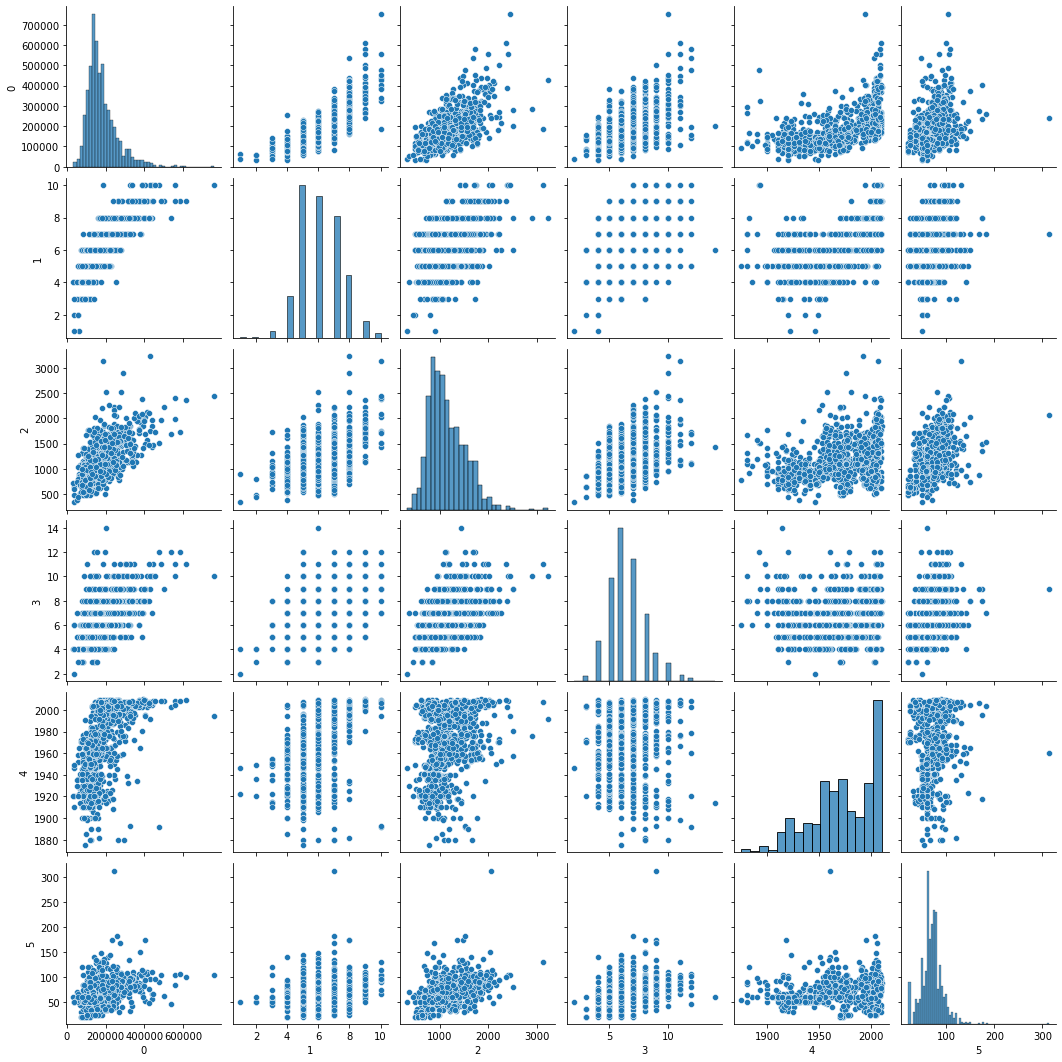

In [75]:
sns.pairplot(Set_Entrenamiento)

In [135]:
Set_Entrenamiento
CORRELACION=pd.DataFrame(Set_Entrenamiento.sum(axis=0))
corr = CORRELACION.corr()

In [137]:
CORRELACION

,0
0,210929444.0
1,7126.0
2,1350586.0
3,7575.0
4,2302655.0
5,67289.0


In [116]:
Set_Entrenamiento.columns.to_list()

[0, 1, 2, 3, 4, 5]

In [118]:
y = pd.DataFrame(print(Set_Entrenamiento.columns.values))

[0 1 2 3 4 5]


In [122]:
Set_Entrenamiento.columns.values.tolist()

[0, 1, 2, 3, 4, 5]